<a href="https://colab.research.google.com/github/Ignowsky/Turnover_Prediction_IBM_Project/blob/main/Turnover_Prediction_IBM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#

# ***Estudo sobre o Turnover - IBM***

## **Introdução e Definição do Problema.**


Vamos iniciar um estudo sobre o turnover em uma empresa de médio porte, possuimos um dataset ***cross-sectional*** ou seja temos uma fotografia de um momento no tempo, e não uma série temporal. Isso limita a nossa capacidade de ver "quando" a insastifacação começou, podemos apenas ver se ela existe hoje.

---

Vamos iniciar carregando nosso dataset dentro da várial `df`, para isso utilizamos os o método `read_csv` da biblioteca `pandas`.

Além disso já podemos visualizar as 5 primeiras linhas e já vemos que temos um dataset com 35 váriveis, utilizando o método `head()` também do pandas.

In [67]:
# Importando a biblioteca pandas
import pandas as pd

# Carregando o csv dentro da variável DF
df = pd.read_csv('/content/Base/HR-Employee-Attrition.csv', sep = ',')

# Apresentando as 15 primeiras linhas do DF
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# **EDA**

### **Analisando as variáveis e entendendo os seus tipos.**


Agora vamos identificar algumas informações do Dataset, como o tamanho total dele (total de registros), integridade dos dados, tipo dos dados, e uma análise de variância para identificar se existem ruídos no dataset analisado.


----
### Colunas do Dataset

```
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
```

|Column|  Non-Null| Count | Dtype |
|-------|----------|--------|-----------|
|Age                      | 1470 |non-null  | int64 |
|Attrition                | 1470 |non-null  | object|
|BusinessTravel           | 1470 |non-null   |object|
|DailyRate                | 1470 |non-null   |int64 |
|Department               | 1470 |non-null   |object|
|DistanceFromHome         | 1470 |non-null   |int64 |
|Education                | 1470 |non-null   |int64 |
|EducationField           | 1470 |non-null   |object|
|EmployeeCount            | 1470 |non-null   |int64 |
|EnvironmentSatisfaction  | 1470 |non-null   |int64 |
|Gender                   | 1470 |non-null   |object|
|HourlyRate               | 1470 |non-null   |int64 |
|JobInvolvement           | 1470 |non-null   |int64 |
|JobLevel                 | 1470 |non-null   |int64 |
|JobRole                  | 1470 |non-null   |object|
|JobSatisfaction          | 1470 |non-null   |int64 |
|MaritalStatus            | 1470 |non-null   |object|
|MonthlyIncome            | 1470 |non-null   |int64 |
|MonthlyRate              | 1470 |non-null   |int64 |
|NumCompaniesWorked       | 1470 |non-null   |int64 |
|Over18                   | 1470 |non-null   |object|
|OverTime                 | 1470 |non-null   |object|
|PercentSalaryHike        | 1470 |non-null   |int64|
|PerformanceRating        | 1470 |non-null   |int64 |
|RelationshipSatisfaction | 1470 |non-null   |int64 |
|StandardHours            | 1470 |non-null   |int64 |
|StockOptionLevel         | 1470 |non-null   |int64 |
|TotalWorkingYears        | 1470 |non-null   |int64 |
|TrainingTimesLastYear    | 1470 |non-null   |int64 |
|WorkLifeBalance          | 1470 |non-null   |int64 |
|YearsAtCompany           | 1470 |non-null   |int64 |
|YearsInCurrentRole       | 1470 |non-null   |int64 |
|YearsSinceLastPromotion  | 1470 |non-null   |int64 |
|YearsWithCurrManager     | 1470 |non-null   |int64 |

---

Com essa visão inicial podemos identificar que no nossa dataset temos um total de 1470 registros, 35 colunas distribuidas entre `int64` e `object`. Além de não possuirmos valores nulos nas colunas, uma situação rara no mundo real, mas facilita nossa modelagem.

---

Analisando um pouco mais as colunas, identificamos que as colunas `employeeCount`, `Over18` e `StandardHours` possuem apenas 1 valor, não tendo um valor real para o nosso estudo e se tornando apenas um ruído no dataset.
Além disso podemos retirar também a variável `EmployeeNumber`, por que o modelo pode acabar levando em consideração por exemplo um colaborador com um numero maior tem mais chance de sair.
Esses são os valores de cada uma:

|EmployeeCount|Over18|StandardHours|
|---------|-----------|------------|
|1|Y|80|


Dessa maneira podemos apenas retirar essas colunas do nosso df.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
# Filtrando apenas as colunas que tem apenas 1 valor único
colunas_inuteis = df.columns[df.nunique() == 1]
df.drop(
    columns = colunas_inuteis,
    inplace = True
)
df.drop(
    columns = ['EmployeeNumber'],
    inplace = True
)



### Análise do Alvo

Como estamos tratando de um dataset de RH, onde queremos entender o turnover o nosso alvo será a variável `Attrition`, ele nós diz se a pessoa saiu ou não da empresa.
Para entendermos como anda nossa rotatividade podemos simplesmente contar o total de `No` que são aqueles que ficaram e o total de `Yes` que são os que saíram.

Para isso podemos utilizar o método `value_counts()` que conta a quantidade de registros para aqueles valores e podemos utilizar ainda o `normalize = True` para vermos a porcentagem.

|Attrition|Total| %|
|-------|--------|------|
|No| 1233| 83.87%
|Yes| 237| 16.12%

Vendo isso, identificamos que temos um dataset desbalanceado. A taxa de turnover (churn) é de 16%. Isso significa que um modelo "preguiçoso" que chutasse que NINGUÉM vai sair teria uma **accuracy** de 84%. Por essa razão nesse projeto, a **accuracy** será uma métrica secundária. O foco principal será de maximizar o **Recall** da classe positiva (Yes), por que para a empresa é muito mais custoso deixar de prever uma saída (Falso Negativo) do que prever uma saída que não acontece (Falso Positivo).

In [25]:
# Calculando o turnover utilizando o método value_counts
turnover = df['Attrition'].value_counts(normalize=True) * 100
print(turnover)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


## **Definição das Hipóteses de Negócio.**

Com o nosso dataset limpo, devemos analisar algumas **hipóteses**. Como se trata de um estudo de RH algumas coisas são um senso comum sendo elas:

1. **O Fator "Burnout" (Sobrecarga)**
    - **A Hipótese**: Funcionários que fazem hora extra (`OverTime` = Yes) tendem a sair mais do que aqueles que cumprem o horário padrão? Podemos ver que 69.17% dos colaboradores que saem da empresa fazem horas extras.
    Indicando que existe a possibilidade da carga de trabalho não estar muito bem distribuida sobrecarregando alguns funcionarios.
        - *Por que importa*: Se for verdade, o RH precisa rever a distribuição de carga de trabalho.

2. **O Fator "Bolso" (Remuneração)**
    - **A Hipótese:** Existe uma faixa salarial (`MonthlyIncome) onde o turnover é crítica? Pessoas que ganham menos saem mais? Sim, podemos observar que as pessoas que saem tendem a ganhar menos, visto que até mesmo a média é bem menor, além de que os maiores salarios estão quase todos focados naqueles que ainda estão na empresa.
        - *Por que importa:* Ajuda a entender se a empresa está pagando mal a base ou se está perdendo talentos seniores.

3. **O Fator "Carreira"** (Estagnação)
    - **A Hipótose:** Funcionários que ficam muito tempo na mesma função (`YearsInCurrentRole`) ou sem promoção (`YearsSinceLastPromotion`) tendem a buscar crescimento fora? Identificamos também que estão na mesma posição por entre 1-4 anos tendem a sair mais, o mesmo vale para as promoção, mas chegando em valores mais altos como 10 anos esse indice cai, dando a entender que pessoas que chegaram nesse tempo estão confortaveis com suas posições atuais, acredito ser cargos de lideranças e c-levels.
        - *Por que importa:* Sinaliza a necessidade de planos de carreira ou rotação interna.

4. **O Fator "Idade/Geração"** (Demográfico)
    - **A Hipótese:** O turnover é concetrando nos funcionários mais jovens (`Age`)
    Identificamos que a geração millenials (26 - 42 anos) é a que mais está saindo da empresa, e quando vamos mais a fundo vemos que a maioria são pessoas do sexo masculino, então estamos perdendo homens na sua fase adulta para o mercado.

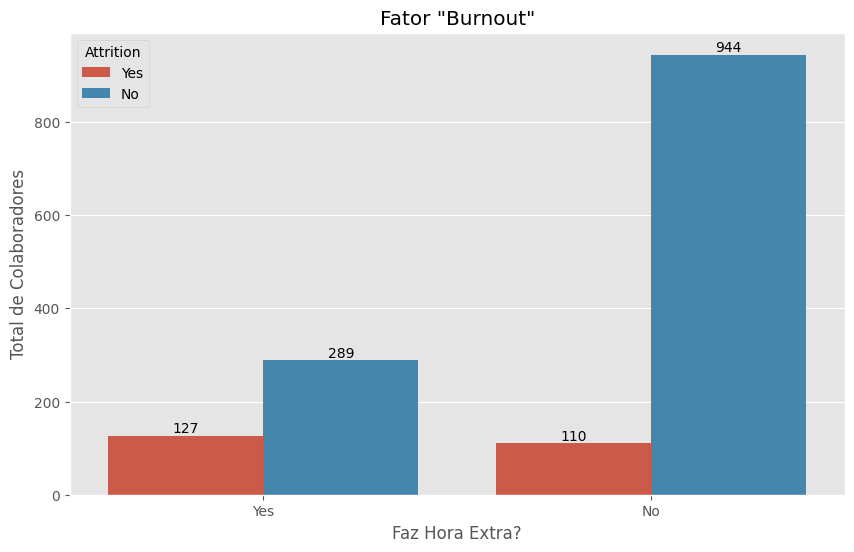

In [81]:
# Importando a biblioteca para visualizar os dados.
# Verificando o fator burnout
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo do gráfico e o tamanho
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))

# Plotando um gráfico de barras
ax = sns.countplot(
    data = df,
    x = 'OverTime',
    hue = 'Attrition'
)

# Adicionando os valores sobre as barras
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Faz Hora Extra?")
plt.ylabel("Total de Colaboradores")
plt.title('Fator "Burnout"')
plt.show()

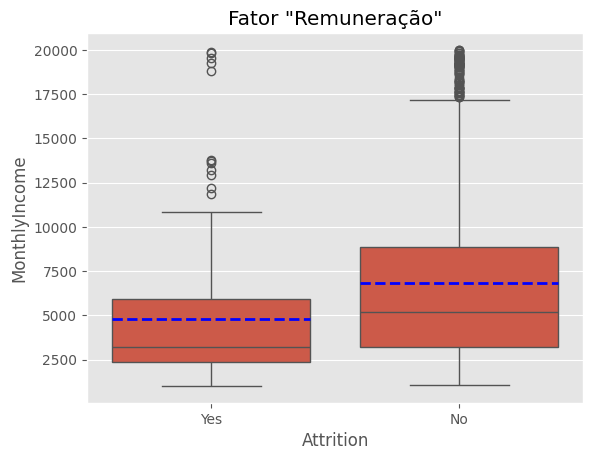

In [7]:
# Verificando o fator remuneração

# Plotando o gráfico, utilizando o mesmo estilo do anterior
ax = sns.boxplot(
    data = df,
    x = 'Attrition',
    y = 'MonthlyIncome',
    # Demonstrando as médias salariais
    showmeans = True,
    meanline = True,
    # Definindo as propriedadas das linhas de média
    meanprops = {
        'color': 'blue',
        'linestyle': '--',
        'linewidth': 2
    }

)

plt.title('Fator "Remuneração"')
plt.show()

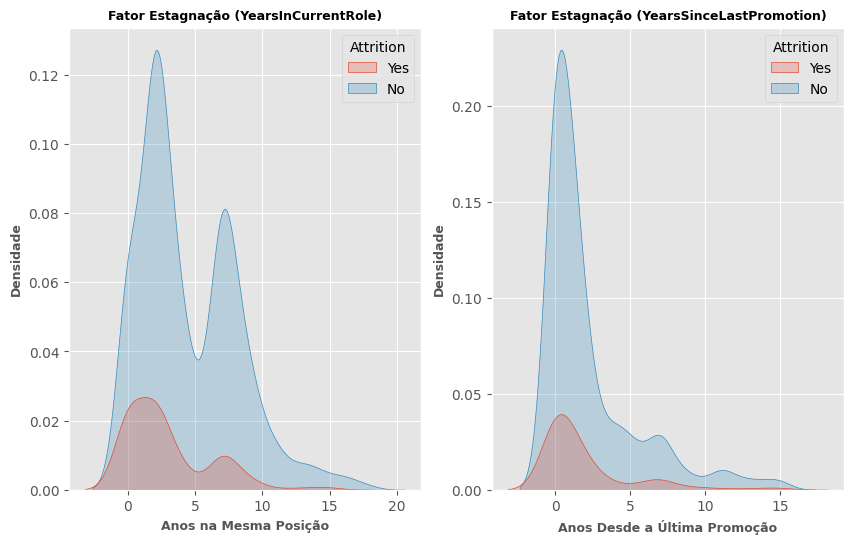

In [90]:
# Verificando o fator Estagnação

# Plotando o gráfico, utilizando o mesmo estilo do anterior
fig, axs = plt.subplots(1, 2, figsize=(10,6)) # Corrected assignment

axs[0] = sns.kdeplot(
    data = df,
    x = 'YearsInCurrentRole',
    hue = 'Attrition',
    fill = True,
    ax = axs[0]
)

axs[1] = sns.kdeplot(
    data = df,
    x = 'YearsSinceLastPromotion',
    hue = 'Attrition',
    fill = True,
    ax = axs[1]
)

axs[0].set_xlabel('Anos na Mesma Posição', fontsize = 9, fontweight = 'bold')
axs[1].set_xlabel('Anos Desde a Última Promoção', fontsize = 9, fontweight = 'bold')
axs[0].set_ylabel('Densidade', fontsize = 9, fontweight = 'bold')
axs[1].set_ylabel('Densidade', fontsize = 9, fontweight = 'bold')
# Set the overall title for the figure
axs[0].set_title("Fator Estagnação (YearsInCurrentRole)", fontsize = 9, fontweight = 'bold')
axs[1].set_title("Fator Estagnação (YearsSinceLastPromotion)", fontsize = 9, fontweight = 'bold')
plt.show()

In [84]:
# Identificando as idades que possuimos no dataset
df['Age'].value_counts().sort_index().reset_index()

# Criação de Bins para o número maximo e minimo de idade
bins = [17, 26, 42, 58, 100]
# Definição dos rotulos das gerações
labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers']

# Criação da nova coluna usando o pd.cut
df['Generation'] = pd.cut(
    df['Age'],
    bins = bins,
    labels = labels
)

# Validando a criação da nova coluna
print(df[['Age', 'Generation']].sample(10)) # -> Apresentando 10 amostras aleatorias
print("\nDistribuição por Geração:")
print(df['Generation'].value_counts(normalize = True))

      Age   Generation
1411   25        Gen Z
988    41  Millennials
1254   49        Gen X
1357   42  Millennials
61     38  Millennials
300    41  Millennials
721    50        Gen X
893    29  Millennials
1320   42  Millennials
149    19        Gen Z

Distribuição por Geração:
Generation
Millennials     0.631973
Gen X           0.247619
Gen Z           0.110204
Baby Boomers    0.010204
Name: proportion, dtype: float64


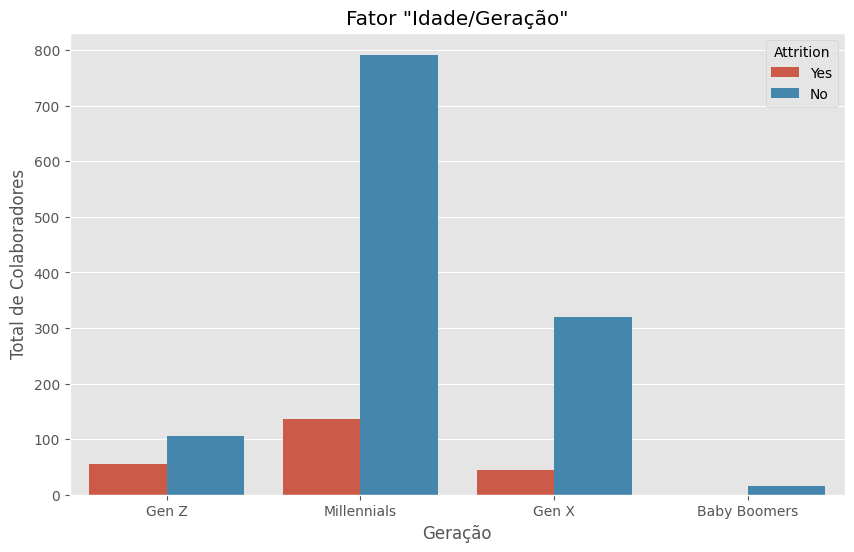

In [86]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotando um gráfico de barras
ax = sns.countplot(
    data = df,
    x = 'Generation',
    hue = 'Attrition'
)
plt.xlabel('Geração')
plt.ylabel('Total de Colaboradores')
plt.title('Fator "Idade/Geração"')
plt.show()

In [83]:
def definir_geracao(age):
    if age < 24: return 'Gen Z'
    elif age < 40: return 'Millenials'
    elif age < 56: return 'Gen X'
    else: return 'Baby Boomers'

df['Generation_Name'] = df['Age'].apply(definir_geracao)

# Convert 'Attrition' to numeric (0 and 1) for calculations in df
df['Attrition_Numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 1. Volume absoluto
print('----------- Quem sai mais em quantidade? -------------')
print(df[df['Attrition'] == 'Yes']['Generation_Name'].value_counts())

# 2. Taxa de Risco
print("\n -------------- Qual grupo é mais infiel ----------")
print(df.groupby('Generation_Name')['Attrition_Numeric'].mean()*100)

----------- Quem sai mais em quantidade? -------------
Generation_Name
Millenials      149
Gen X            49
Gen Z            31
Baby Boomers      8
Name: count, dtype: int64

 -------------- Qual grupo é mais infiel ----------
Generation_Name
Baby Boomers    17.021277
Gen X           10.315789
Gen Z           43.661972
Millenials      16.989738
Name: Attrition_Numeric, dtype: float64


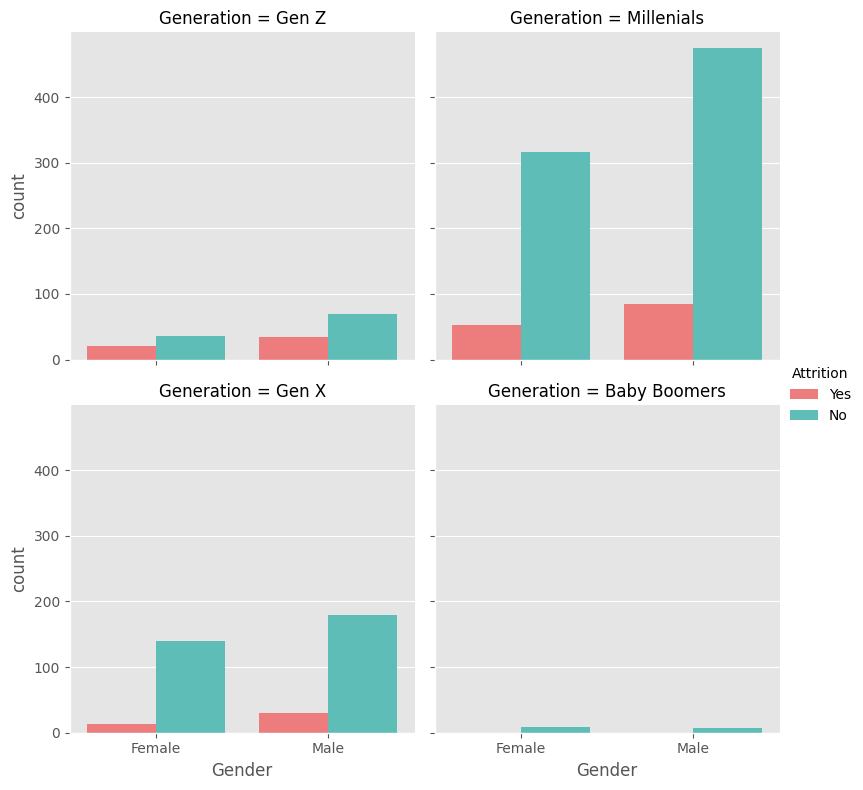

In [11]:
sns.catplot(
    data = df,
    x = 'Gender',
    hue = 'Attrition',
    col = 'Generation',
    kind = 'count',
    col_wrap = 2,
    height = 4,
    palette = {'Yes': '#FF6B6B', 'No': '#4ECDC4'}
)

plt.show()

### **Preparando os Dados (Enconding)**

Agora que já entendemos alguns pontos do nosso dataset por exemplo a gereção que mais está saindo e oque os fatores que estão motivando essa saída precisamos preparar o nosso dataset para treinar um modelo.

Esse modelo vai nos ajudar a prever quem são as pessoas que estão saindo, para que possamos nos adiantar, se analisarmos que existe chance da empresa perder um talento precisamos tratar isso para que essa perca não ocorra.

Para isso devemos transformar nossas váriaveis categorias em variáveis binarias, visto que os modelos só aceitam caracteres como 0s e 1s.

Para fazer isso podemos utilizar o método `get_dummies()´ do pandas, poderiamos fazer isso listando 1 a 1 as variavéis do tipo objetct, mas esse método caso não seja especificada a variável varre todo o dataset para que nenhuma passe em branco.

Manualmente iremos tratar tratar apenas nossa variável alvo `Attrition` e o `OverTime`, já que são valores binarios (Yes = 1, No = 0) podemos utilizar o `map()` junto com um dicionario para ter uma maior siguridade nesse tratamento.

---
Utilizando o método `select_dtypes()` junto com o `info()` podemos selecionar apenas as variáveis do tipo object

|Column|          Non-Null| Count|  Dtype|
|-------|------------------|------|-----------------|
|0   |Attrition       |1470 |non-null   |object|
|1   |BusinessTravel  |1470 |non-null   |object|
|2   |Department      |1470 |non-null   |object|
|3   |EducationField  |1470 |non-null   |object|
|4   |Gender          |1470 |non-null   |object|
|5   |JobRole         |1470 |non-null   |object|
|6   |MaritalStatus   |1470 |non-null   |object|
|7   |OverTime        |1470 |non-null   |object|

---

Tratando essas variáveis utilizando o método `pd.get_dummies()` junto com `drop_first = True` e `dtype = int` temos o seguinte dataset final.

|Column|                             |Non-Null| Count|  Dtype
|--- | ------                             |------|--------|  -----
| 0  | Age                                |1470| non-null |  int64
| 1   |Attrition                          |1470| non-null |  int64
| 2   |DailyRate                          |1470| non-null |  int64
| 3   |DistanceFromHome                   |1470| non-null |  int64
| 4   |Education                          |1470| non-null |  int64
| 5   |EnvironmentSatisfaction            |1470| non-null |  int64
| 6   |HourlyRate                         |1470| non-null |  int64
| 7   |JobInvolvement                     |1470| non-null |  int64
| 8   |JobLevel                           |1470| non-null  | int64
| 9   |JobSatisfaction                    |1470| non-null  | int64
| 10  |MonthlyIncome                      |1470| non-null  | int64
| 11  |MonthlyRate                        |1470| non-null  | int64
| 12  |NumCompaniesWorked                 |1470| non-null  | int64
| 13  |OverTime                           |1470| non-null  | int64
| 14  |PercentSalaryHike                  |1470| non-null  | int64
| 15  |PerformanceRating                  |1470| non-null  | int64
| 17  |StockOptionLevel                   |1470| non-null  | int64
| 18  |TotalWorkingYears                  |1470| non-null  | int64
| 19  |TrainingTimesLastYear              |1470| non-null  | int64
| 20  |WorkLifeBalance                    |1470| non-null  | int64
| 21  |YearsAtCompany                     |1470| non-null  | int64
| 22  |YearsInCurrentRole                 |1470| non-null  | int64
| 23  |YearsSinceLastPromotion            |1470| non-null  | int64
| 24  |YearsWithCurrManager               |1470|non-null   |int64
| 25  |BusinessTravel_Travel_Frequently   |1470| non-null  | int64
| 26  |BusinessTravel_Travel_Rarely       |1470| non-null  | int64
| 27  |Department_Research & Development  |1470| non-null  | int64
| 28  |Department_Sales                   |1470| non-null  | int64
| 29  |EducationField_Life Sciences       |1470| non-null  | int64
| 30  |EducationField_Marketing           |1470| non-null  | int64
| 31  |EducationField_Medical             |1470| non-null  | int64
| 32  |EducationField_Other               |1470| non-null  | int64
| 33  |EducationField_Technical Degree    |1470| non-null  | int64
| 34  |Gender_Male                        |1470| non-null  | int64
| 35 | JobRole_Human Resources            |1470| non-null  | int64
| 36  |JobRole_Laboratory Technician      |1470| non-null  | int64
| 37  |JobRole_Manager                    |1470| non-null  | int64
| 38  |JobRole_Manufacturing Director     |1470| non-null  | int64
| 39  |JobRole_Research Director          |1470| non-null  | int64
| 40  |JobRole_Research Scientist         |1470| non-null  | int64
| 41  |JobRole_Sales Executive            |1470| non-null   |int64
| 42  |JobRole_Sales Representative       |1470| non-null   |int64
| 43  |MaritalStatus_Married              |1470| non-null   |int64
| 44  |MaritalStatus_Single               |1470| non-null   |int64
| 45  |Generation_Millenials              |1470| non-null   |int64
|46  |Generation_Gen X                   |1470 |non-null   |int64
| 47  |Generation_Baby Boomers           | 1470| non-null   |int64

In [12]:
# Capturando apenas as váriaveis do tipo object
df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 92.0+ KB


In [13]:
# 0. Copiando o dataset para não perder o original
data = df.copy()

# 1. tratando as variáveis binarias, transformando Yes em 1 e No em 0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

# 2. Utilizando o One-Hot Enconding automárico do método get_dummies()
data = pd.get_dummies(data, drop_first = True, dtype = int)

# 3. Validando as alterações que fizemos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

### **Dividindo o Dateset**

Agora que já temos todas as colunas em formatos numericos, precisamos separar o nosso dataset entre treino e teste. Fazemos isso utilizando a biblioteca `sklearn.model_selection` e importamos `train_test_split`. Mas antes de separarmos precisamos definir nosso target (`attrition`) e as features (todo o restante do dataset).
Para isso simplesmentes criamos um novo dataset chamado target que vai possuir apenas o `attrition` e depois criamos um outro chamado features retirando apenas o target.

---

Feito isso podemos seguir com a divisão utilizando o train_test_split


In [14]:
# Selecionando a coluna da variável target ("attrition")
y = data.Attrition

# Retirando a coluna target do dataset e salvando as variáveis como features
X = data.drop('Attrition', axis=1)


In [15]:
# Importando a função para dividir o dataset entre treino e teste
from sklearn.model_selection import train_test_split

# Usando train_test_split para separar o dataset em conjuntos de treino e teste tanto o target quando o feature
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,    # Separando 25% para testes
    random_state = 42,   # Semente para reprodutibilidade
    stratify = y         # Garante a proporção de 16% de turnover no treino e no teste
)

print(f"Tamanho do dataset de treino: {X_train.shape}")
print(f"Tamanho do dataset de teste: {X_test.shape}")

Tamanho do dataset de treino: (1102, 47)
Tamanho do dataset de teste: (368, 47)


### **Inicializando o modelo**

Nesse momento iniciamos a criação do modelo de árvore de decisão, até o momento estamos testando algumas hipóteses então o modelo não terá parâmetros e por isso alcançamos um recall tão baixo de apenas 0.34, ou seja estamos perdendo talentos.

---

Com um recall tão baixo, temos a necessidade de definir alguns parâmetros e utilizando o `GridSearchCV`descobrimos que os melhores parâmetros para o nosso modelo seria de `max_depth = 5` e `min_sample_leaf = 50`, apenas com essa alteração dobramos o nosso recall, alcançando um indice de 0.64 ou seja de 3 funcionarios que iriam sair conseguimos resgatar 2.

---

Com mais alguns decidi definir uma limitação para o modelo me avisar quem vai sair, com isso definimos uma régua de 0.30, a pessoa que tiver essa probabilidade de sair já é um alerta para o RH. Definindo essa régua conseguimos aumentar ainda mais o recall alcançando um recall de 0.76, ou seja de cada 4 funcionarios que sai recuperamos pelo menos 3 deles.

Um melhora incrivel onde triplicamos o nosso recall, oque torna o nosso modelo ainda mais necessario para a empresa.

------------- Relatório de Classificação -----------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       309
           1       0.30      0.34      0.32        59

    accuracy                           0.77       368
   macro avg       0.59      0.60      0.59       368
weighted avg       0.78      0.77      0.77       368



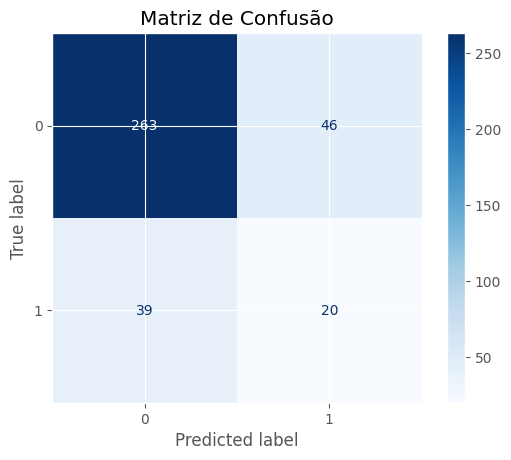

In [16]:
from numpy import random
# Importando as funções para criar o algoritmo
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Instanciando o modelo com o ajuste de peso
tree_model = DecisionTreeClassifier(
    random_state = 42,
    class_weight = 'balanced'
)

# 2. Treinando o modelo (fit)
tree_model.fit(X_train, y_train)

# 3. Fazendo as previsões
y_pred = tree_model.predict(X_test)

# 4. Avaliando o resultado
print("------------- Relatório de Classificação -----------------")
print(classification_report(y_test, y_pred))

# 5. Visualizando a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

In [17]:
# Importando a biblioteca grindseachCV
from sklearn.model_selection import GridSearchCV

# Ajuste de hiperparametros
# Gerando valores de profundide
depth = [i for i in range (5, 25, 1)]

# Gerando valores de tamanho de folhas
samples = [i for i in range (50, 600, 50)]

# Craindo o dicionario de parametros
parameters = dict(
    max_depth = depth,
    min_samples_leaf = samples
)

param_search = GridSearchCV(
    tree_model,
    parameters,
    cv = 5
)

# Treinando o param_search
param_search.fit(X_train, y_train)

# Apresentando os melhores parâmetros encontrados
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


------------- Relatório de Classificação -----------------
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       309
           1       0.29      0.64      0.40        59

    accuracy                           0.69       368
   macro avg       0.60      0.67      0.60       368
weighted avg       0.81      0.69      0.73       368

------------- Validação Cruzada -----------------------
[69.68325792 68.32579186 67.72727273 71.36363636 72.72727273]


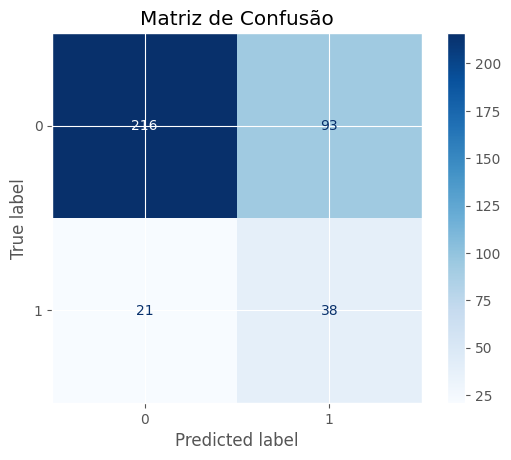

In [18]:
from sklearn.model_selection import cross_val_score

# 1. Instanciando o modelo com o ajuste de peso
tree_model_depth_5 = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_leaf = 50,
    random_state = 42,
    class_weight = 'balanced'
)

# 2. Treinando o modelo (fit)
tree_model_depth_5.fit(X_train, y_train)

# 3. Fazendo as previsões
y_pred_depth_5 = tree_model_depth_5.predict(X_test)

# 4. Avaliando o resultado
print("------------- Relatório de Classificação -----------------")
print(classification_report(y_test, y_pred_depth_5))

print("------------- Validação Cruzada -----------------------")
print(cross_val_score(tree_model_depth_5, X_train, y_train, cv = 5)*100)

# 5. Visualizando a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_depth_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

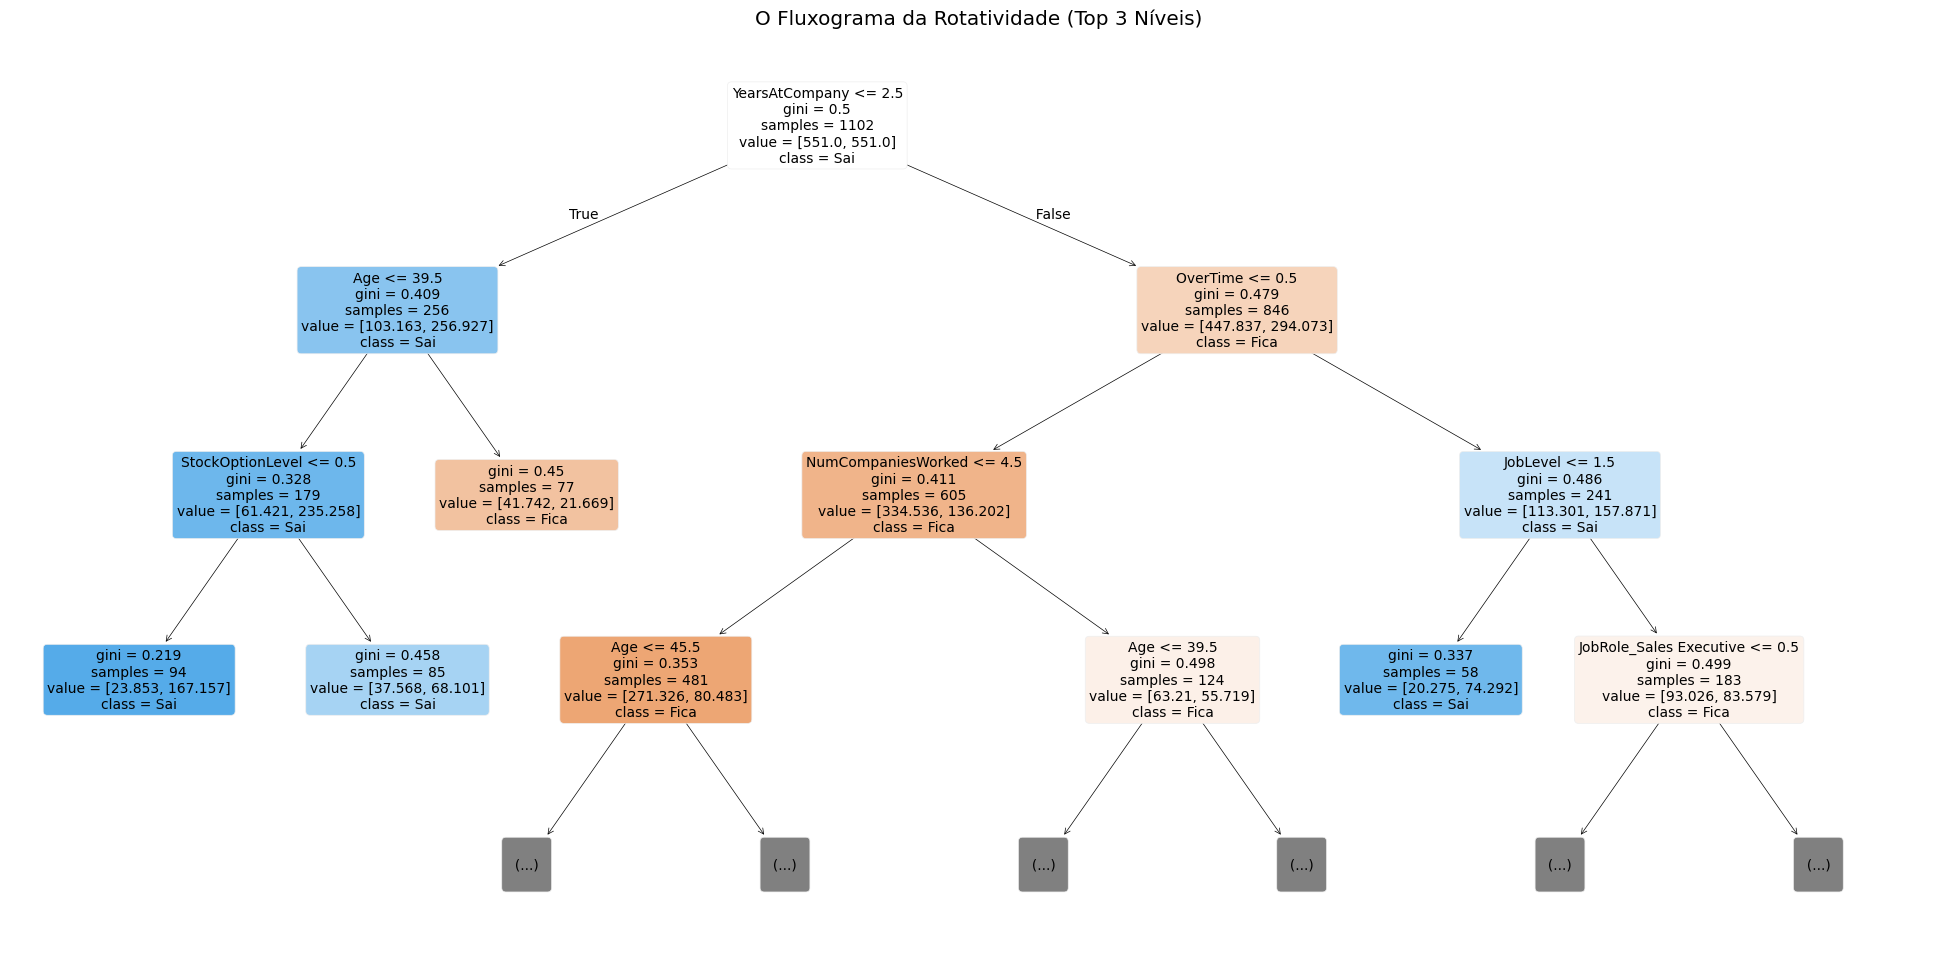

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configurando o tamanho para ficar legível
plt.figure(figsize=(25, 12))

# Plotando a árvore
plot_tree(
    tree_model_depth_5,         # Seu modelo campeão
    filled=True,                # Cores para identificar as classes
    feature_names=X_train.columns, # Nome das variáveis
    class_names=['Fica', 'Sai'],   # Nome das classes (0, 1)
    rounded=True,               # Caixas arredondadas (estética)
    fontsize=10,                # Tamanho da fonte
    max_depth=3                # Mostrando só as 3 primeiras camadas para não poluir
)

plt.title("O Fluxograma da Rotatividade (Top 3 Níveis)")
plt.show()

O peso de desbalanceamento será: 5.19
------------- Relatório de Classificação -----------------
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       309
           1       0.40      0.46      0.43        59

    accuracy                           0.80       368
   macro avg       0.65      0.66      0.66       368
weighted avg       0.82      0.80      0.81       368

------------- Validação Cruzada -----------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_enconder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_enconder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_enconder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_enconder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:03] WARNING

[80.54298643 87.33031674 82.27272727 86.36363636 85.45454545]


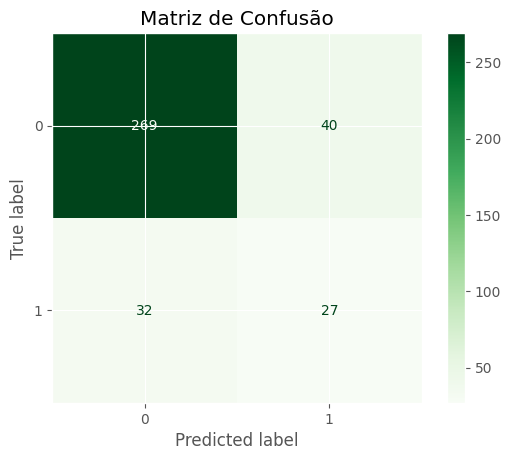

In [20]:
from xgboost import XGBClassifier

# 1. Calcuando o peso para desbalanceamento
# Conta quantos 0 (ficou) e quantos 1 (saiu) existem no treino
count_class_0 = y_train.value_counts()[0]
count_class_1 = y_train.value_counts()[1]
ratio = count_class_0 / count_class_1

print(f"O peso de desbalanceamento será: {ratio:.2f}")

# 2. Instaciando a ferrari (XGBoost)
xgb_model = XGBClassifier(
    scale_pos_weight = ratio,
    random_state = 42,
    learning_rate = 0.1,
    n_estimators = 100,
    max_depth = 3,
    use_label_enconder = False,
    eval_metric = 'logloss'
)

# Treinamento
xgb_model.fit(X_train, y_train)

# Prevendo e avaliando
y_pred_xgb = xgb_model.predict(X_test)

print("------------- Relatório de Classificação -----------------")
print(classification_report(y_test, y_pred_xgb))

print("------------- Validação Cruzada -----------------------")
print(cross_val_score(xgb_model, X_train, y_train, cv = 5)*100)

# Visualizando a matrix de confusão dele
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matriz de Confusão")
plt.show()


In [21]:
# 2. Instaciando a ferrari (XGBoost)
xgb = XGBClassifier(
    random_state = 42,
    eval_metric = 'logloss'
)

# Testando os parametros
parametros = {
    'scale_pos_weight': [5, 10, 15, 20],
    'max_depth': [3, 5, 7],
    'leraning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Gridsearch com foco no recall
grid_xgb = GridSearchCV(
    estimator = xgb,
    param_grid = parametros,
    scoring = 'recall',
    cv = 3,
    verbose = 1
)

# Treinamento
grid_xgb.fit(X_train, y_train)

# Resultados
print(f"Melhores Parâmetros: {grid_xgb.best_params_}")
print(f"Melhor Recall no Treino (Cross-Validation): {grid_xgb.best_score_:.2f}")

# Teste final
y_pred_best_xgb = grid_xgb.predict(X_test)
print("------------- Relatório de Classificação -----------------")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "leraning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "leraning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "leraning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "leraning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:06:06] WARNING: /workspace/src/lea

Melhores Parâmetros: {'leraning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 20}
Melhor Recall no Treino (Cross-Validation): 0.61
------------- Relatório de Classificação -----------------
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       309
           1       0.29      0.53      0.37        59

    accuracy                           0.72       368
   macro avg       0.59      0.64      0.60       368
weighted avg       0.80      0.72      0.75       368



------------- Relatório de Classificação -----------------
              precision    recall  f1-score   support

           0       0.92      0.51      0.66       309
           1       0.23      0.76      0.35        59

    accuracy                           0.55       368
   macro avg       0.57      0.64      0.51       368
weighted avg       0.81      0.55      0.61       368

------------- Relatório Cruzado ---------------------
[69.68 68.33 67.73 71.36 72.73]


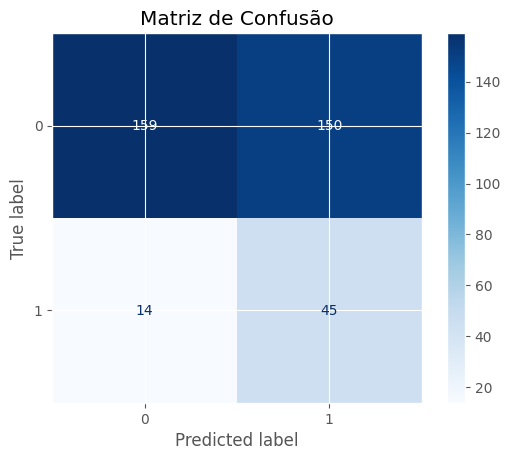

In [79]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Instanciando o modelo com o ajuste de peso
tree_model_depth_5 = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_leaf = 50,
    random_state = 42,
    class_weight = 'balanced'
)

# 2. Treinando o modelo (fit)
tree_model_depth_5.fit(X_train, y_train)

# 3. Fazendo as previsões
y_proba = tree_model_depth_5.predict_proba(X_test)[:, 1]


# 3.1 Definindo uma régua sensivel para nos alertar
limite_alerta = 0.30
y_pred_agressivo = (y_proba >= limite_alerta).astype(int)

# 4. Avaliando o resultado
print("------------- Relatório de Classificação -----------------")
print(classification_report(y_test, y_pred_agressivo))

print("------------- Relatório Cruzado ---------------------")
# Corrected line: Pass the estimator (model) to cross_val_score
print(np.round(cross_val_score(tree_model_depth_5, X_train, y_train, cv = 5)*100,2))
# Visualizando a matrix de confusão dele
cm = confusion_matrix(y_test, y_pred_agressivo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

## Principais motivos de saída.
**negrito**
Com esse modelo descobrimos que os principais motivos que estamos perdendo colaboradores são:

|Posição |Feature|  Importance|
|------|-----------|-------|
|1° |YearsAtCompany |   0.303180|
|2° |Age    |0.216072|
|3° |OverTime  |  0.183474|


Sálario não aparece nem entre os 8 primeiros motivos, para isso devemos ter medidas para cada uma dessa situação.

E essas repostas reforçam ainda mais nossa analise exploratoria, onde vimos que estagnação, geração e burnout são os fatores principais para a saída.

/tmp/ipython-input-289282759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


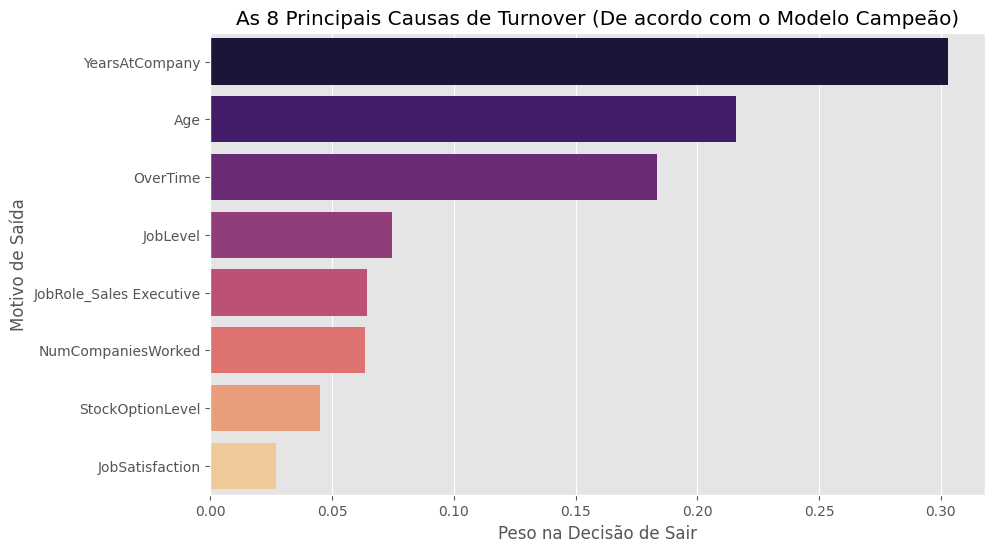

           Feature  Importance
20  YearsAtCompany    0.303180
0              Age    0.216072
12        OverTime    0.183474


In [80]:
# Capturando as importancais do modelo campeão
importances = tree_model_depth_5.feature_importances_
feature_names = X_train.columns

# Criando o DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

# Plotando as top 8 causa de demissão
plt.figure(figsize = (10, 6))
sns.barplot(
    x = 'Importance',
    y = 'Feature',
    data = importance_df.head(8),
    palette = 'magma'
)

plt.title("As 8 Principais Causas de Turnover (De acordo com o Modelo Campeão)")
plt.ylabel('Motivo de Saída')
plt.xlabel('Peso na Decisão de Sair')

plt.show()

print(importance_df.head(3))

## **Entrega Final: Lista de Risco para o RH**

Aqui geramos um arquivo excel para o nosso RH, onde vai estar descrito quem são as pessoas que ultrapassaram a nossa régua e possuem algum tipo de alerta para sair da empresa.

Dessa maneira antecipamos os colaboradores, diminuimos gastos com rescisões, novas contratações e treinamentos. E focamos em medidas protetivas para o time, aumentamos a proximidade do RH e ainda melhorarmos o clima do trabalho.

In [66]:
# 1. Calculando a probabilidade de saída
# Usamos a coluna 1, que é a probabilidade de "Yes"

probabilidades = tree_model_depth_5.predict_proba(X_test)[:, 1]

# 2. Criamos um DataFrame "Relatorio de Risco"
# Pegando o ID original ou apenas listamos
relatorio_risco = X_test.copy()
relatorio_risco['Risco_Probabilidade'] = probabilidades

# 3. Categorizando o risco (Farol)
def classificar_risco(prob):
    if prob >= 0.70:
        return "CRÍTICO 🔴" # Quase certeza que irá sair
    elif prob >= 0.50:
        return "ALTO 🟠" # Probabilidade alta
    elif prob >= 0.30:
        return "ALERTA 🟡" # Régua ajustada
    else:
        return "BAIXO 🟢"

relatorio_risco['Nivel_Risco'] = relatorio_risco['Risco_Probabilidade'].apply(classificar_risco)

# 4. Filtrando apenas quem precisa de atenção (Quem é alerta para cima)
lista_para_rh = relatorio_risco[relatorio_risco['Risco_Probabilidade'] >= 0.30].sort_values(by = 'Risco_Probabilidade', ascending = False)

# Selecionando colunas úteis para o RH ler
# Trazendo de volta as colunas originais se necessário
cols_visualizacao = ['Nivel_Risco', 'Risco_Probabilidade', 'OverTime', 'YearsAtCompany', 'Age', "MonthlyIncome"]

print(f"--------------- ATENÇÃO: Identificamos {len(lista_para_rh)} funcionários em risco --------------------")
display(lista_para_rh[cols_visualizacao])

# 5. Exportando para Excel (O que o RH ama)
lista_para_rh.to_excel("Relatorio_Retencao_Janeiro.xlsx")

--------------- ATENÇÃO: Identificamos 195 funcionários em risco --------------------


,Nivel_Risco,Risco_Probabilidade,OverTime,YearsAtCompany,Age,MonthlyIncome
670,CRÍTICO 🔴,0.875123,0,1,27,2318
764,CRÍTICO 🔴,0.875123,0,1,28,1052
688,CRÍTICO 🔴,0.875123,1,1,19,2121
689,CRÍTICO 🔴,0.875123,0,1,20,2973
1379,CRÍTICO 🔴,0.875123,0,1,27,2863
...,...,...,...,...,...,...
465,ALERTA 🟡,0.341716,0,2,46,10527
770,ALERTA 🟡,0.341716,0,2,46,19627
547,ALERTA 🟡,0.341716,1,2,42,2759
1371,ALERTA 🟡,0.341716,0,0,56,5380
